**NYC Crime Trend Analysis** - SyedH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
# Read the CSV file into a DataFrame
dataSet = pd.read_csv('arrest_data.csv')

#Options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataSet.head(10)


In [ ]:
# Dropping rows with missing values
dataS = dataSet.dropna()
dataS.head(10)

In [10]:
# Number of rows and columns
rows = dataSet.shape[0]
columns = dataSet.shape[1]
print(rows)
print(columns)

189774
24


In [ ]:
# Converting 'ARREST_DATE' column to datetime
dataS['ARREST_DATE'] = pd.to_datetime(dataS['ARREST_DATE'])

# Sort the dataset by 'ARREST_DATE'
dataS = dataS.sort_values(by='ARREST_DATE')

dataS.head(10)


In [ ]:
# Reseting the index of the dataset
dataS = dataS.reset_index(drop=True)
dataS.head(10)

In [13]:
# Replacing abbreviations in 'ARREST_BORO' column with full names
dataS['ARREST_BORO'] = dataS['ARREST_BORO'].replace({'Q': 'QUEENS',
                                                         'K': 'BROOKLYN',
                                                         'B': 'BRONX',
                                                         'M': 'MANHATTAN',
                                                         'S': 'STATEN ISLAND'
                                                         })
# Save the cleaned dataset to a CSV file
dataS.to_csv('arrest_data.csv', index = False)

In [ ]:
# Frequency of each crime category
crime_frequency = dataS['OFNS_DESC'].value_counts()
crime_frequency.head()


In [ ]:
#10 most frequent crime categories
crime_frequency = dataS['OFNS_DESC'].value_counts().nlargest(10)

# Defining plot style
sns.set_style('darkgrid')

# Creating a bar plot for the crime frequency
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(crime_frequency.index, crime_frequency.values, color='#386B7F')

# Describing plot title, labels, and rotation of x-axis labels
ax.set_title('Number of Crimes per Category in NYC (2022)', fontsize=16)
ax.set_xlabel('Crime Category', fontsize=12)
ax.set_ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=70)

# Adding gridlines and annotations for the values
ax.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(crime_frequency.values):
    ax.text(i, v+50, str(v), ha='center', fontsize=10)

plt.show()



In [ ]:
#Number of arrests by borough
boroughs = dataS['ARREST_BORO'].value_counts()
boroughs

In [ ]:
# Setting the plot style
sns.set_style('whitegrid')

# Creating a bar plot for the number of arrests by borough
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=boroughs.values, y=boroughs.index, color=(0, 0, 0.5, 0.8))

# Setting plot labels and title
plt.xlabel('Number of Arrests')
plt.ylabel('Borough')
plt.title('Arrests by Borough in NYC, 2022')

# Adding annotations for the values
for i, v in enumerate(boroughs.values):
    ax.text(v+10, i, str(v), ha='left', va='center', fontsize=12)

plt.show()


In [ ]:
# Count of perpetrator races
perpetrator_race = dataS['PERP_RACE'].value_counts()
perpetrator_race


In [ ]:
# Grouping the data by perpetrator race and sex, and counting the number of crimes
grouped_data = dataS.groupby(['PERP_RACE', 'PERP_SEX'])['OFNS_DESC'].count()

# Dropping the 'UNKNOWN' and 'AMERICAN INDIAN/ALASKAN NATIVE' rows from the grouped data
grouped_data = grouped_data.drop(['UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE'])

# Reshaping the data into a pivot table
pivot_data = grouped_data.unstack()

# Setting the plot style
sns.set_style('whitegrid')

# Creating a stacked bar plot for crime statistics by race and gender
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)

# Setting plot labels and title
plt.xlabel('Perpetrator Race', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.title('Crime Statistics by Race and Gender', fontsize=16)

# Adding a legend and annotations for the values
handles, labels = ax.get_legend_handles_labels()
labels = ['Female', 'Male']
ax.legend(reversed(handles), reversed(labels), fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
for patch in ax.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    if height > 0.03 * ax.get_ylim()[1]:  
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center', fontsize=12)

plt.xticks(rotation=15, fontsize=10)
ax.tick_params(axis='x', which='major', pad=10)
ax.grid(axis='y', linestyle='-', alpha=0.5)

plt.show()



**Time-Series Analysis**

In [20]:
 # Import the ARIMA class
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# Resample the data to monthly frequency
monthly_data = dataS.resample('M', on='ARREST_DATE').size()

# Create an ARIMA model for forecasting
model = ARIMA(monthly_data, order=(1, 1, 1))
model_fit = model.fit()

In [22]:
# Setting the forecast start and end dates
forecast_start = pd.to_datetime('2023-01-01')
forecast_end = pd.to_datetime('2023-5-31')
forecast = model_fit.predict(start=forecast_start, end=forecast_end)

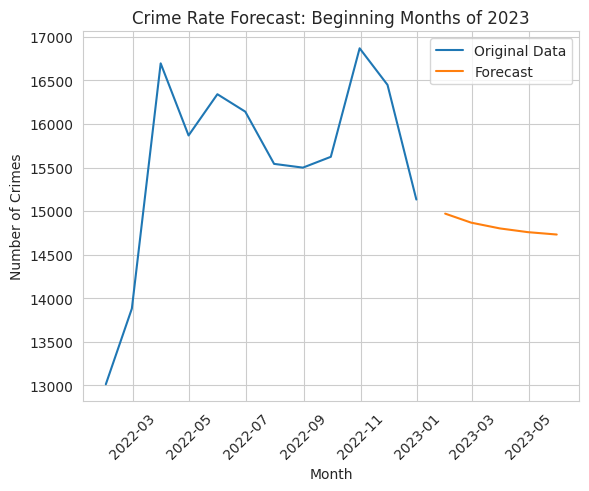

In [23]:
# Plotting the original data and the forecast
plt.plot(monthly_data.index, monthly_data.values, label='Original Data')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crime Rate Forecast: Beginning Months of 2023')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
